In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import math 

from utils import get_x_and_y_from_issue_df, get_count_from_issue_df, get_time_from_issue_df, iqr_outlier_filter

In [2]:
# Globals
issue_file = 'issue_data.csv'
pr_file = 'pr_data.csv'

In [3]:
# TODO
# I require the use of pd.eval. Yet, I must remove the it for it is quite dangerous. I find this quite vexxing.
# TODO filer out all product issues from issue_df at this stage

issue_df = pd.read_csv(issue_file, parse_dates=['opened', 'assigned', 'pr_made', 'closed'], converters={'labels': pd.eval})
pr_df = pd.read_csv(pr_file)

In [4]:
#pd.set_option("display.max_rows", 70)
#issue_df[400:450].head(70)

def examine_data(col_name_1, col_name_2, label, rows=70):
    def filter_for_labels(lst, label):
        if not label:
            return True

        label = label.lower()
        for item in lst:
            if label in item.lower():
                return True

        return False

    def filter_df(col, label):
        result_arr = []
        for item in col:
            result_arr.append(filter_for_labels(item, label))
        return result_arr

    new_col_name = f'{col_name_1}_to_{col_name_2}'

    one_to_two_df = issue_df.loc[issue_df[col_name_1].notna() & issue_df[col_name_2].notna() & filter_df(issue_df['labels'], label), ['issue_num', col_name_1, col_name_2, 'labels']]
    one = one_to_two_df[col_name_1]
    two = one_to_two_df[col_name_2]
    one_to_two_df[new_col_name] = two - one

    pd.set_option("display.max_rows", rows)
    return one_to_two_df.head(rows)

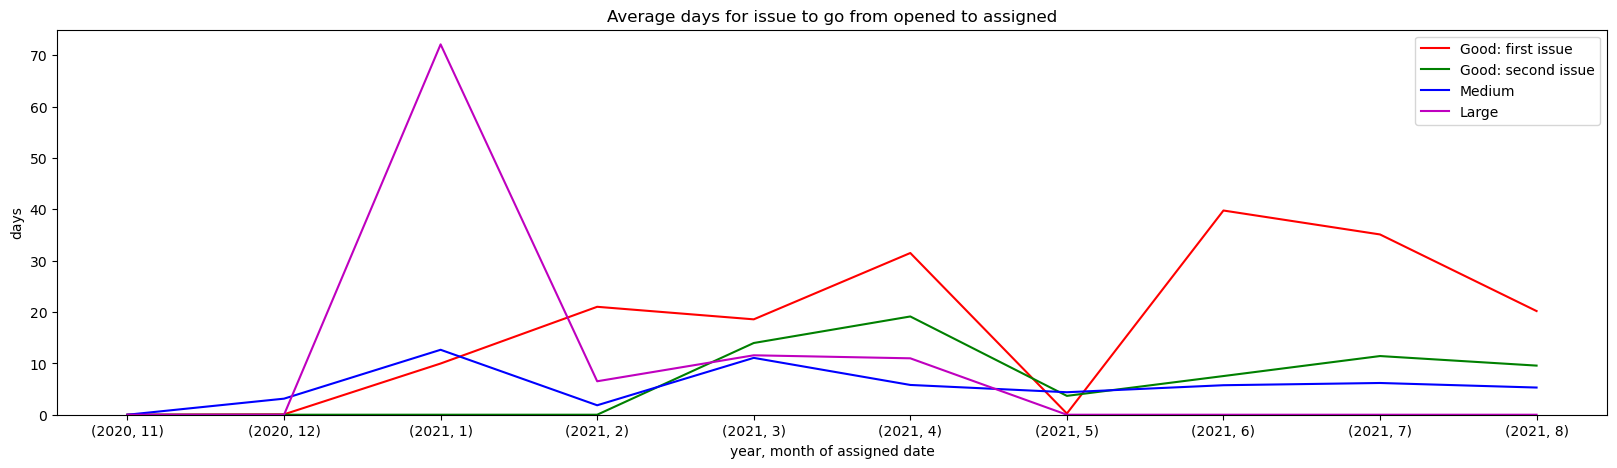

In [5]:
# Plotting
past_count = 5
base_round = 5
time1 = 'opened'
time2 = 'assigned'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'first issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'second issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'medium')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'large')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

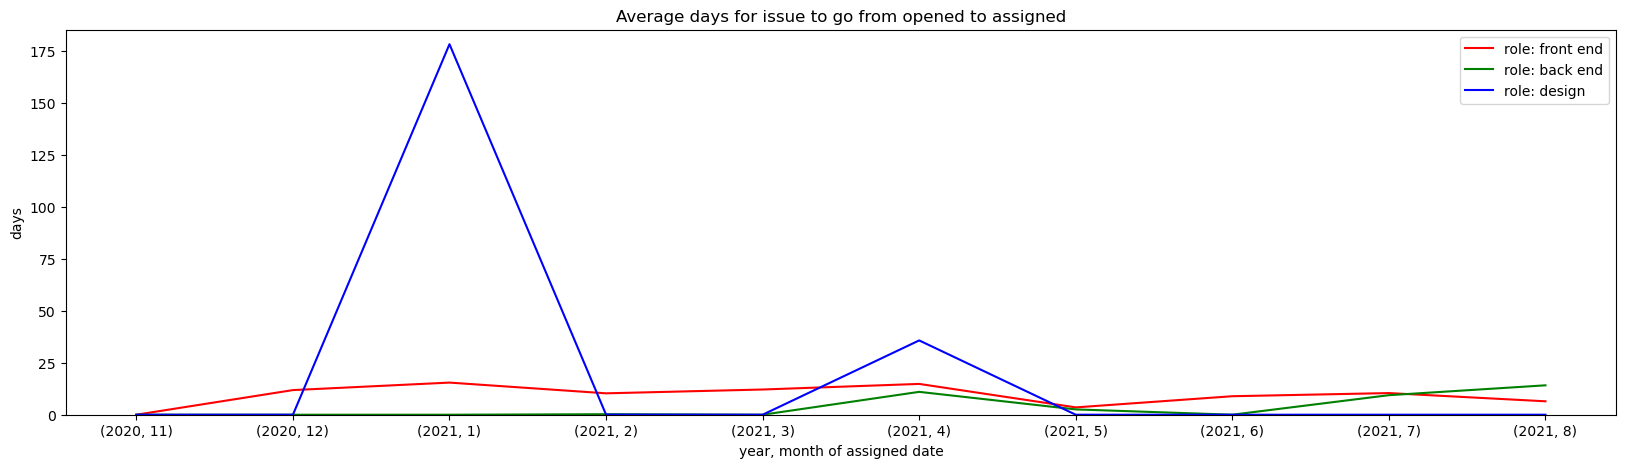

In [6]:
# Plotting
past_count = 5
base_round = 5
time1 = 'opened'
time2 = 'assigned'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: front end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: back end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: design')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='role: design')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

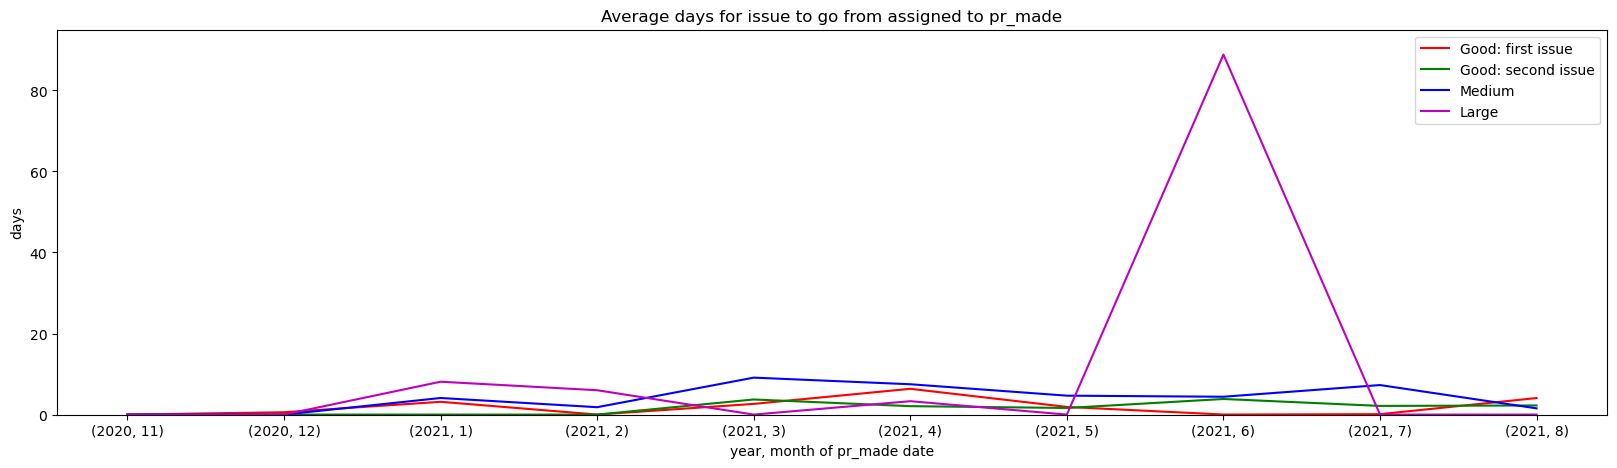

In [7]:
# Plotting
past_count = 5
base_round = 5
time1 = 'assigned'
time2 = 'pr_made'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'first issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'second issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'medium')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'large')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

In [8]:
examine_data('assigned', 'pr_made', 'large')

,issue_num,assigned,pr_made,labels,assigned_to_pr_made
350,794,2021-01-03 21:24:02+00:00,2021-01-12 00:02:47+00:00,"[role: front end, Size: Large, P-Feature: Tool...",8 days 02:38:45
442,966,2021-02-05 17:57:35+00:00,2021-02-18 00:22:03+00:00,"[Bug, role: front end, Size: Large, P-Feature:...",12 days 06:24:28
443,967,2021-02-10 03:51:45+00:00,2021-02-21 23:34:43+00:00,"[Bug, role: front end, Size: Large, P-Feature:...",11 days 19:42:58
468,1030,2021-02-10 04:18:22+00:00,2021-02-13 23:08:51+00:00,"[enhancement, role: front end, Size: Large]",3 days 18:50:29
503,1069,2021-02-22 01:01:19+00:00,2021-02-24 05:04:19+00:00,"[role: front end, Size: Large, Status: Updated]",2 days 04:03:00
513,1085,2021-02-21 20:49:58+00:00,2021-02-21 20:52:47+00:00,"[Research, role: front end, Size: Large]",0 days 00:02:49
522,1104,2021-03-17 17:59:56+00:00,2021-06-14 14:09:51+00:00,"[role: front end, Size: Large, To Update !, P-...",88 days 20:09:55
628,1284,2021-04-09 18:40:07+00:00,2021-04-13 01:55:39+00:00,"[role: back end, Size: Large, Status: Updated]",3 days 07:15:32


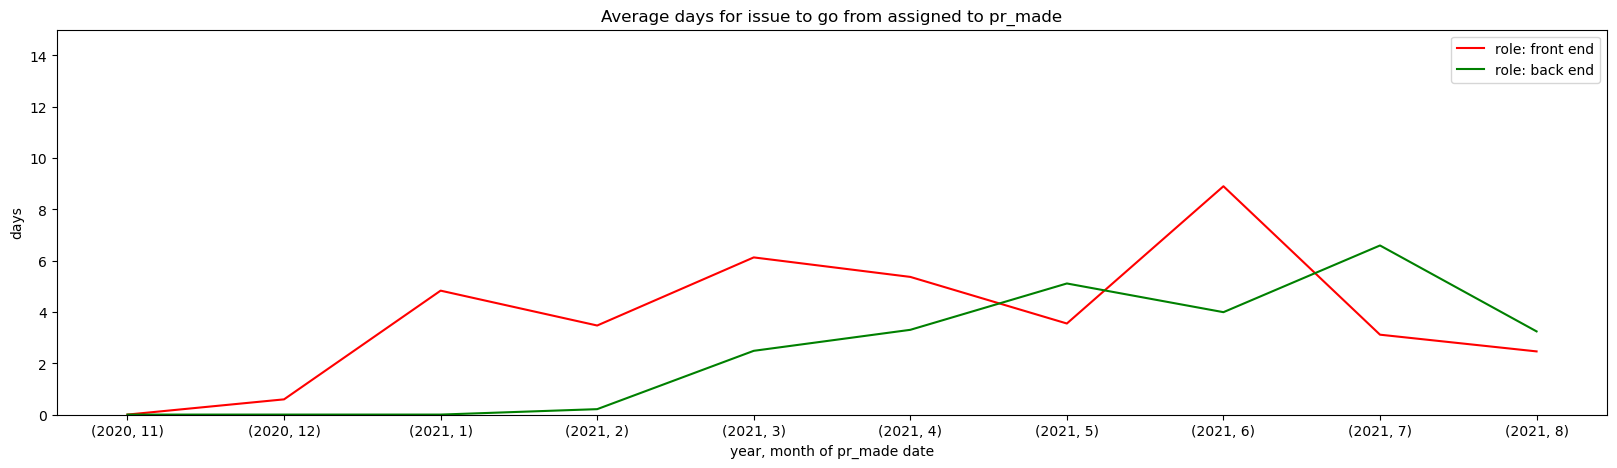

In [9]:
# Plotting
past_count = 5
base_round = 5
time1 = 'assigned'
time2 = 'pr_made'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: front end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: back end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

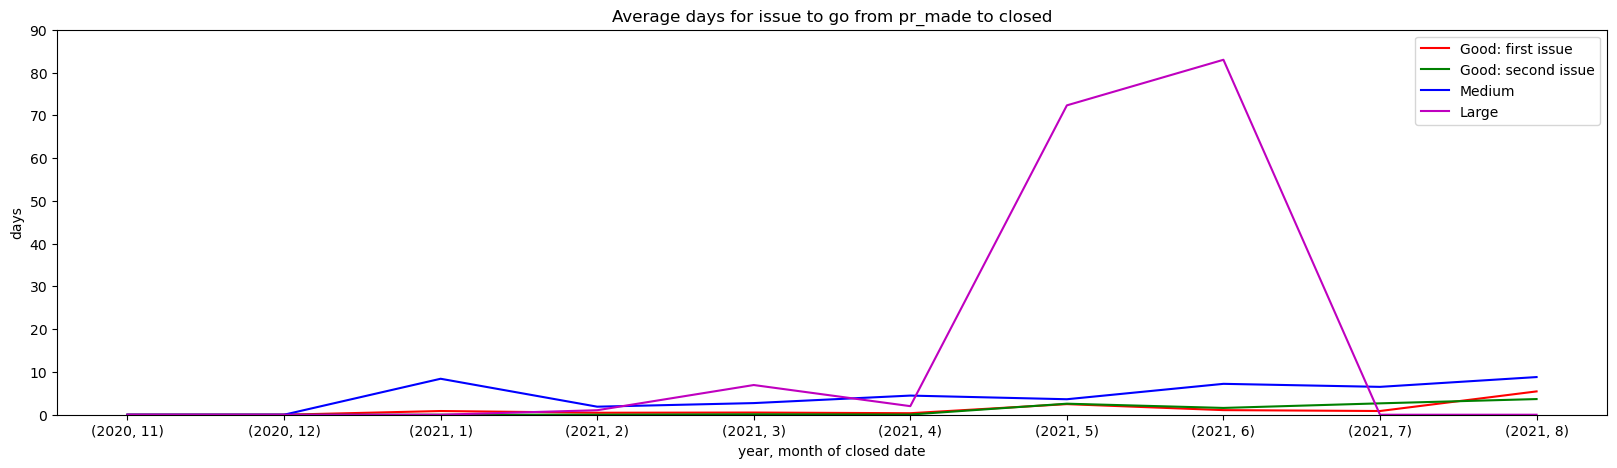

In [10]:
# Plotting
past_count = 5
base_round = 5
time1 = 'pr_made'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'first issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'second issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'medium')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'large')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

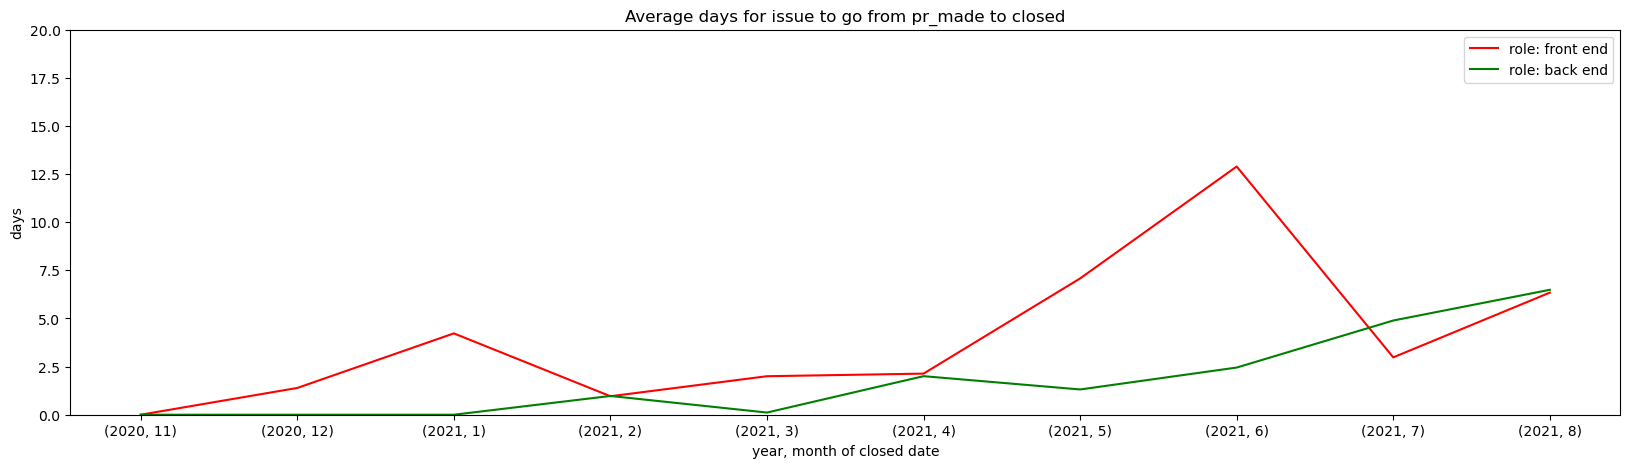

In [11]:
# Plotting
past_count = 5
base_round = 5
time1 = 'pr_made'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: front end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: back end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

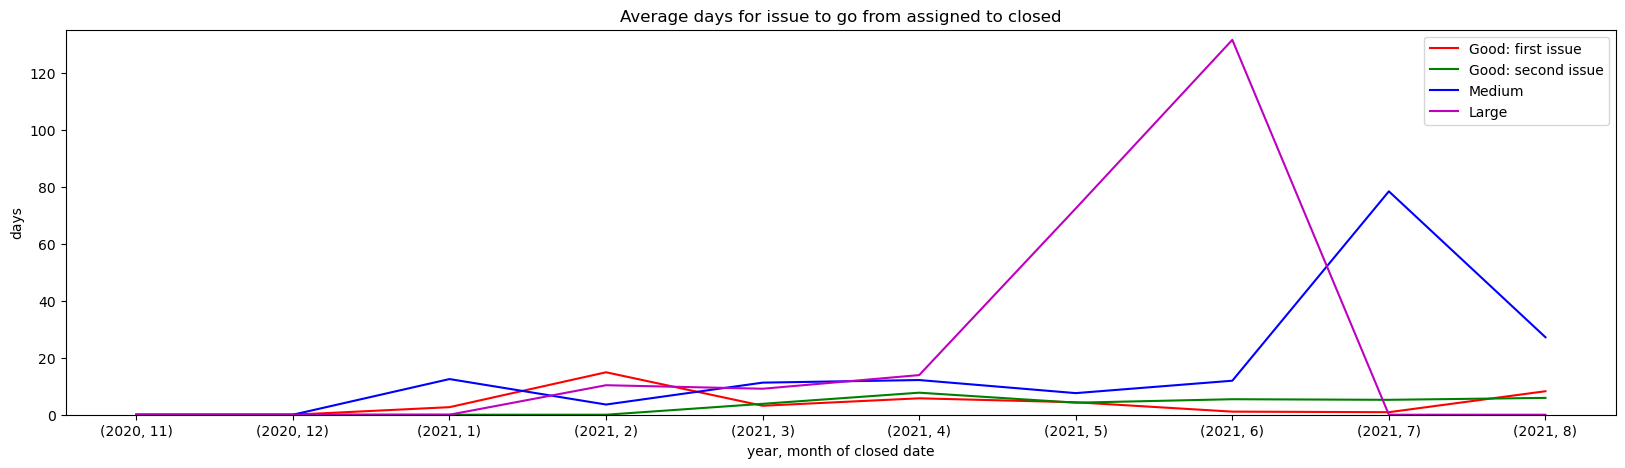

In [12]:
# Plotting
past_count = 5
base_round = 5
time1 = 'assigned'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'first issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'second issue')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'medium')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'large')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

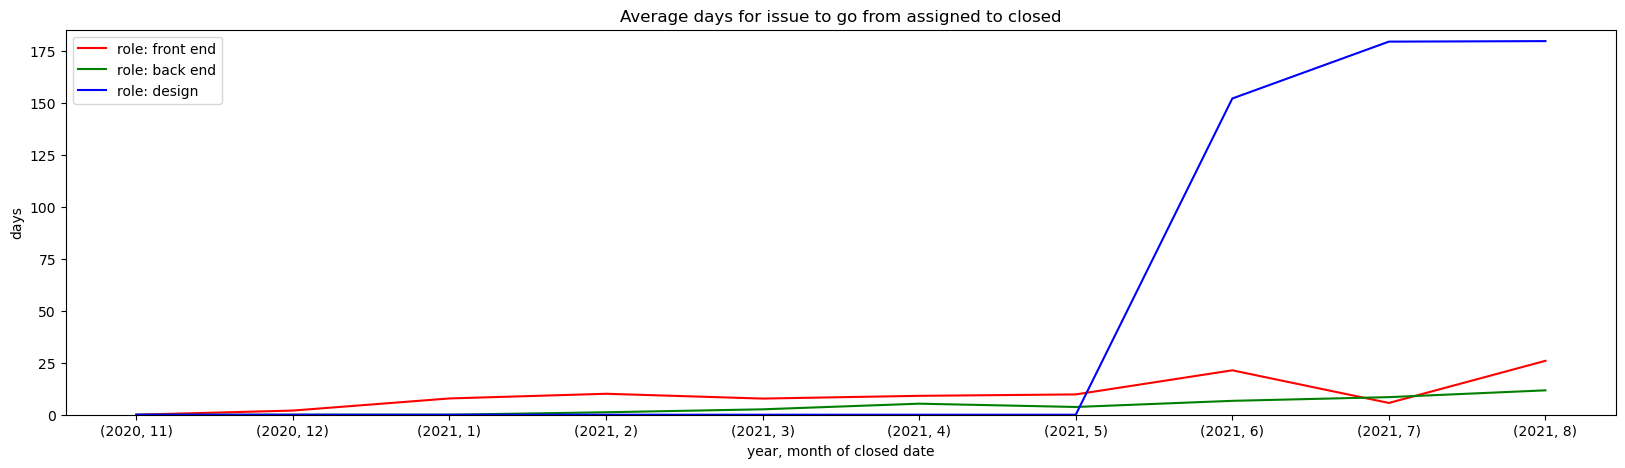

In [13]:
# Plotting
past_count = 5
base_round = 5
time1 = 'assigned'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: front end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: back end')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
x, y = get_x_and_y_from_issue_df(issue_df, time1, time2, 'role: design')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='role: design')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

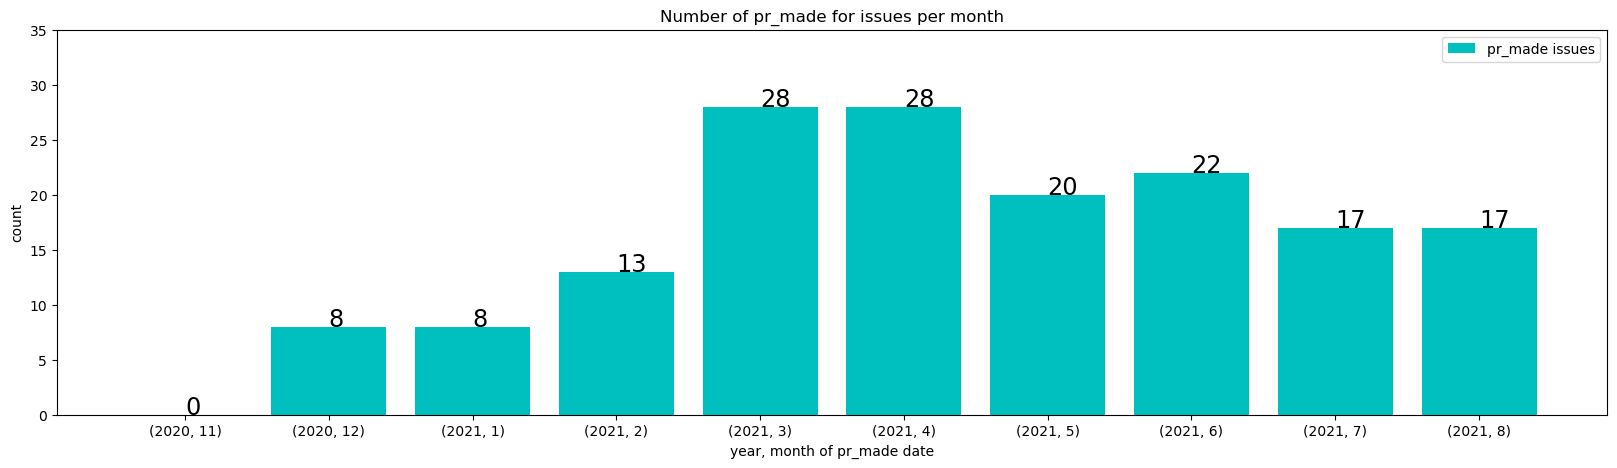

In [14]:
# Plotting
past_count = 10
base_round = 5
col_name = 'pr_made'
plt.figure(figsize=(20,5))
x, y = get_count_from_issue_df(issue_df, col_name)
plt.bar(x[-past_count:], y[-past_count:], color='c', label=f'{col_name} issues')
for index, val in enumerate(y[-past_count:]):
    plt.text(index, val, str(val), fontsize='xx-large')
plt.ylim([0, base_round * (round(max(y)/base_round) + 1)])
plt.title(f'Number of {col_name} for issues per month')
plt.xlabel(f'year, month of {col_name} date')
plt.ylabel('count')
plt.legend()
plt.show()

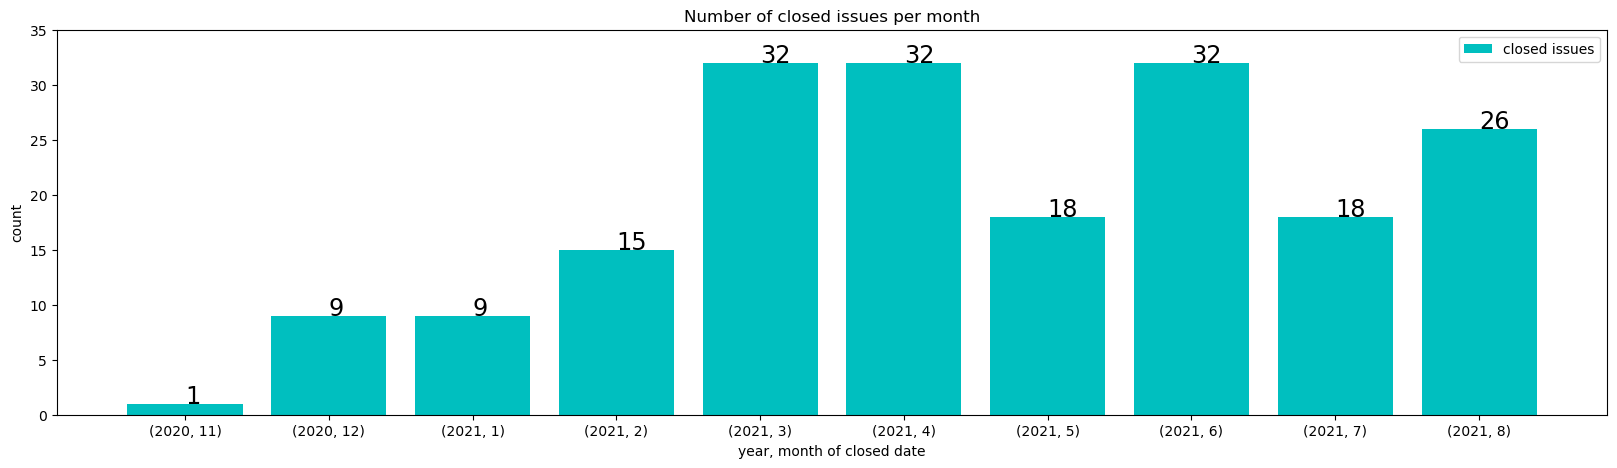

In [15]:
# Plotting
past_count = 10
base_round = 5
col_name = 'closed'
plt.figure(figsize=(20,5))
x, y = get_count_from_issue_df(issue_df, col_name)
plt.bar(x[-past_count:], y[-past_count:], color='c', label=f'{col_name} issues')
for index, val in enumerate(y[-past_count:]):
    plt.text(index, val, str(val), fontsize='xx-large')
plt.ylim([0, base_round * (round(max(y)/base_round) + 1)])
plt.title(f'Number of {col_name} issues per month')
plt.xlabel(f'year, month of {col_name} date')
plt.ylabel('count')
plt.legend()
plt.show()

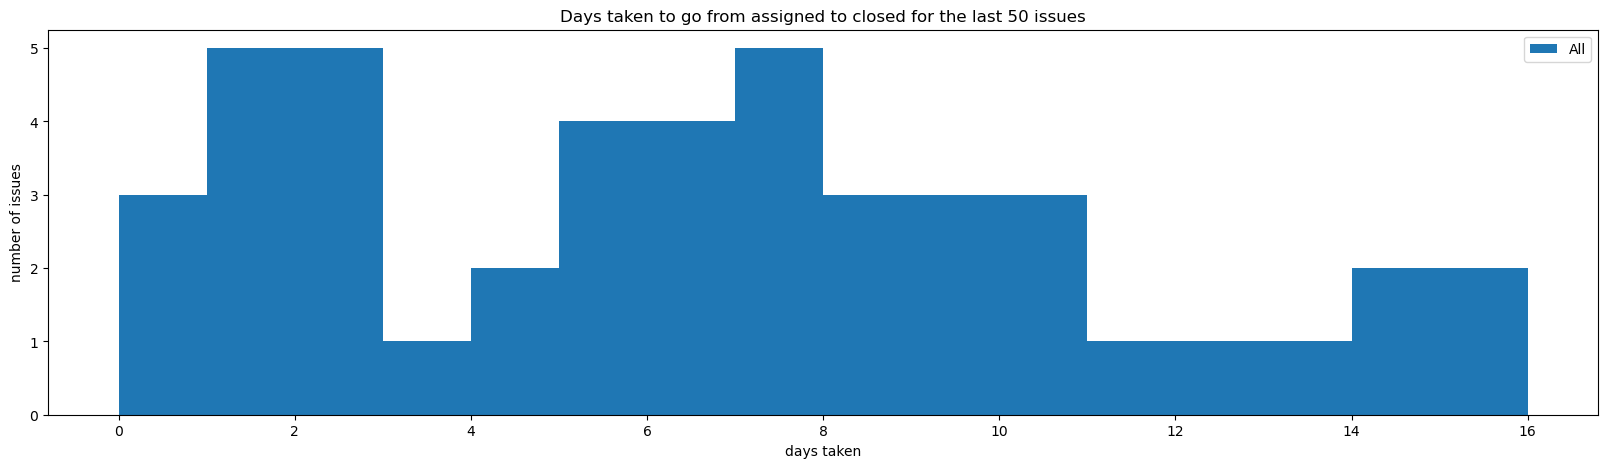

In [33]:
# Plotting
past_count = 50
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = None
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label='All')
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

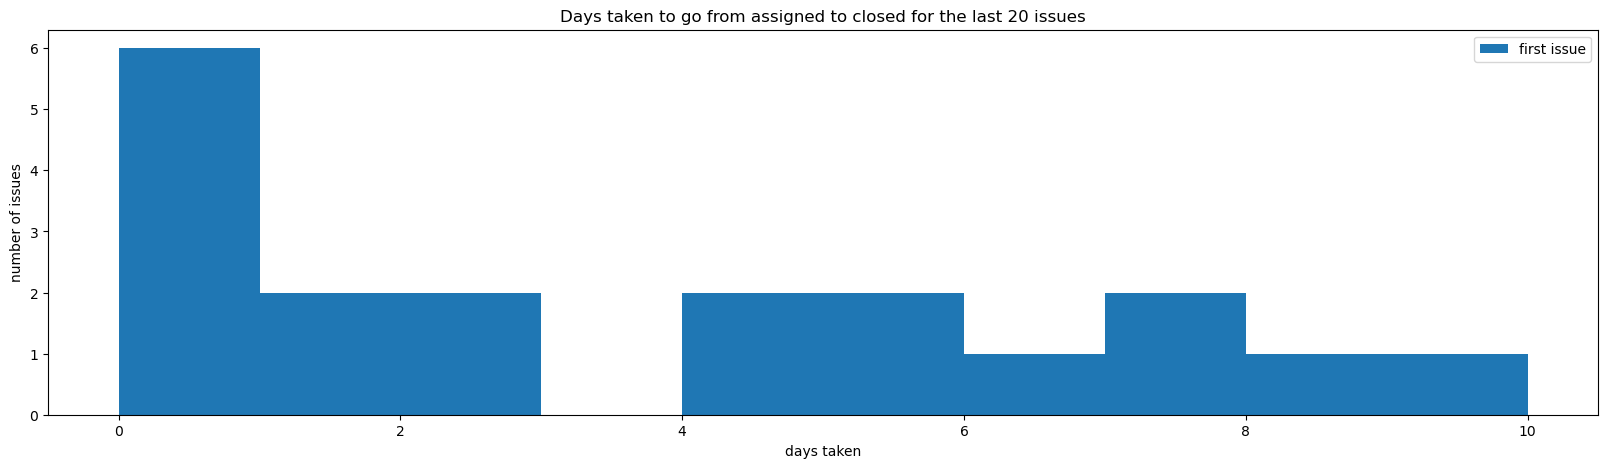

In [34]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'first issue'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

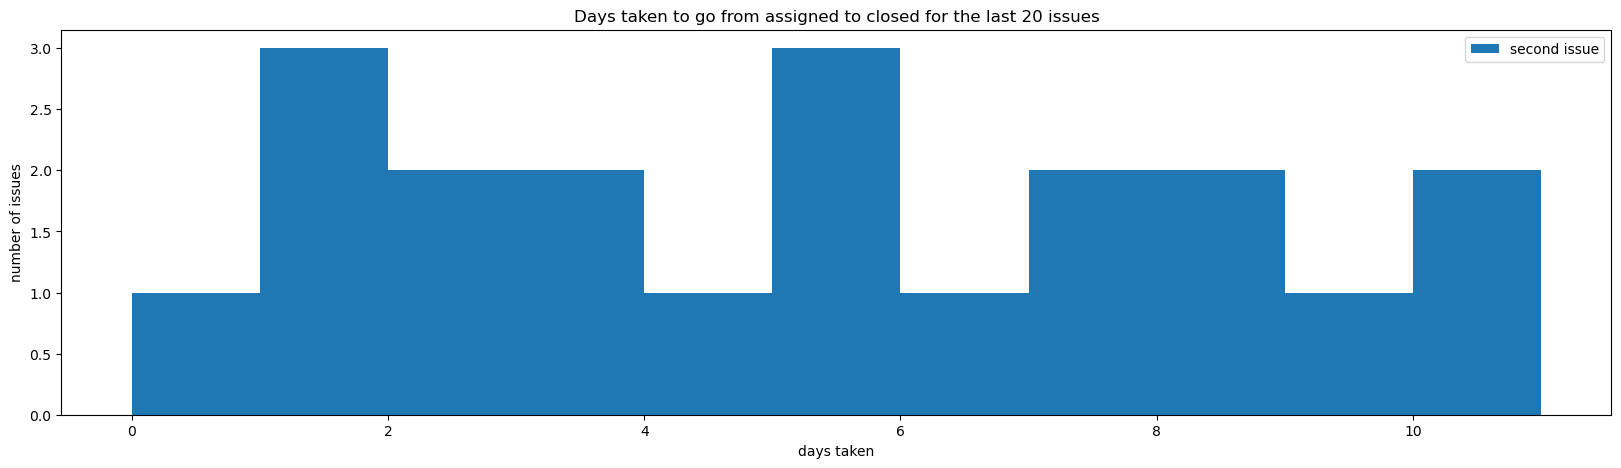

In [35]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'second issue'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

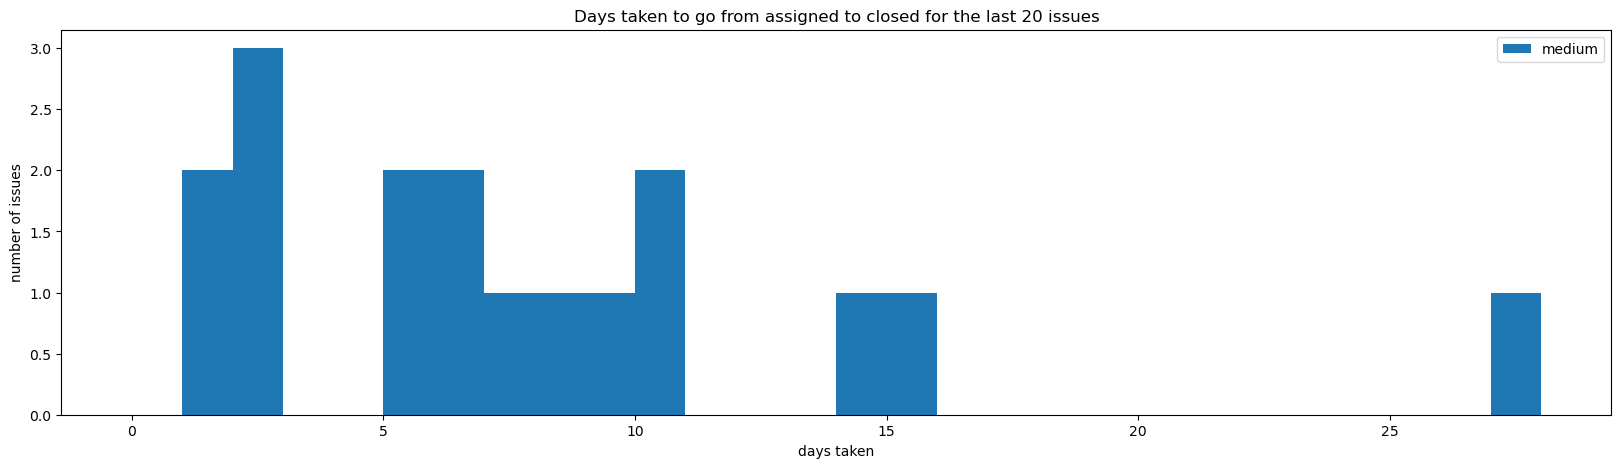

In [36]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'medium'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

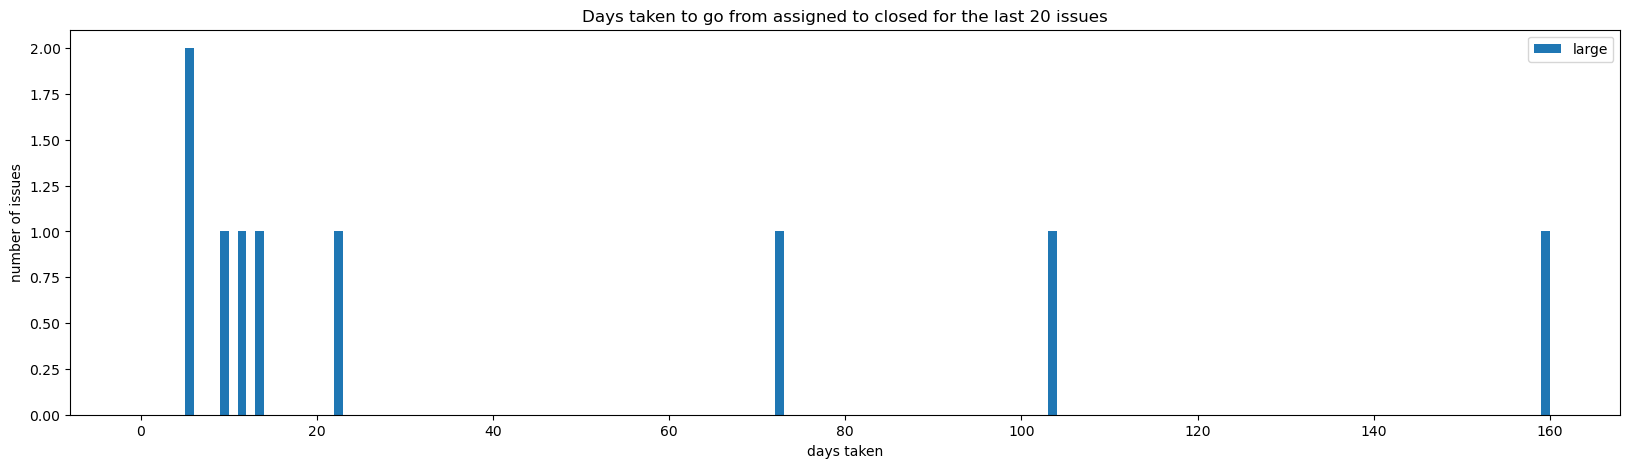

In [37]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'large'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()